In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('Data\emnist-letters-train.csv')
test = pd.read_csv('Data\emnist-letters-test.csv')

In [3]:
train_labels = np.array(train.iloc[:,0].values) - 1
train_letters = np.array(train.iloc[:,1:].values)

test_labels = np.array(test.iloc[:,0].values) - 1
test_letters = np.array(test.iloc[:,1:].values)

In [4]:
def reshape_normalize(data):
    data = data / 255.0
    data = data.reshape(len(data), 28, 28, 1)
    return data

In [5]:
train_letters = reshape_normalize(train_letters)
test_letters = reshape_normalize(test_letters)

x_train, x_val, y_train, y_val = train_test_split(train_letters,
                                                  train_labels,
                                                  test_size=0.2,
                                                  random_state=42)

print('training set: ', x_train.shape, y_train.shape)
print('validation set: ', x_val.shape, y_val.shape)
print('test set: ', test_letters.shape, test_labels.shape)

training set:  (71039, 28, 28, 1) (71039,)
validation set:  (17760, 28, 28, 1) (17760,)
test set:  (14799, 28, 28, 1) (14799,)


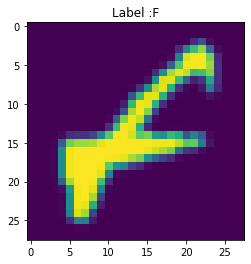

In [9]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

def show_image(image, label):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    plt.title('Label :' + letters[label])
    plt.imshow(image)

n = random.randint(0, len(x_train))
show_image(x_train[n], y_train[n])

In [10]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32, 3, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                                 
Total params: 696,026
Trainable params: 696,026
Non-trainable params: 0
__________________________________________________

In [11]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10)

Epoch 1/10
2220/2220 [==============================] - 37s 16ms/step - loss: 0.6510 - accuracy: 0.8020 - val_loss: 0.4225 - val_accuracy: 0.8674
Epoch 2/10
2220/2220 [==============================] - 33s 15ms/step - loss: 0.3279 - accuracy: 0.8936 - val_loss: 0.3449 - val_accuracy: 0.8874
Epoch 3/10
2220/2220 [==============================] - 39s 17ms/step - loss: 0.2556 - accuracy: 0.9144 - val_loss: 0.3156 - val_accuracy: 0.8990
Epoch 4/10
2220/2220 [==============================] - 41s 18ms/step - loss: 0.2084 - accuracy: 0.9285 - val_loss: 0.3165 - val_accuracy: 0.8994
Epoch 5/10
2220/2220 [==============================] - 32s 14ms/step - loss: 0.1773 - accuracy: 0.9377 - val_loss: 0.3210 - val_accuracy: 0.8994
Epoch 6/10
2220/2220 [==============================] - 31s 14ms/step - loss: 0.1527 - accuracy: 0.9442 - val_loss: 0.3458 - val_accuracy: 0.8983
Epoch 7/10
2220/2220 [==============================] - 33s 15ms/step - loss: 0.1333 - accuracy: 0.9505 - val_loss: 0.3605 -

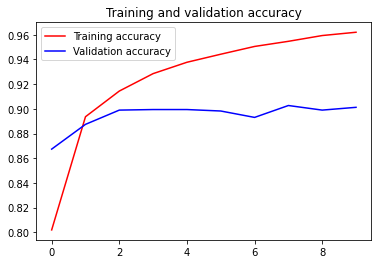

<Figure size 432x288 with 0 Axes>

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

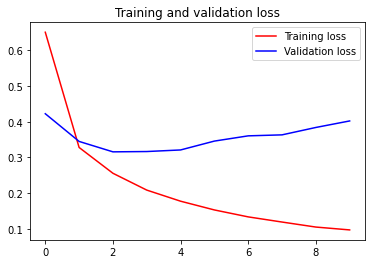

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [14]:
test_loss, test_accuracy = model.evaluate(test_letters, test_labels, verbose = 2)

print("Test Loss: ",test_loss)
print("Test Accuracy: ",test_accuracy)

463/463 - 2s - loss: 0.4539 - accuracy: 0.8880 - 2s/epoch - 5ms/step
Test Loss:  0.4538513422012329
Test Accuracy:  0.8880329728126526
